In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('../dataset/Countryclusters.csv')

In [3]:
raw_data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


In [4]:
raw_data.shape

(6, 4)

In [5]:
data = raw_data.copy()

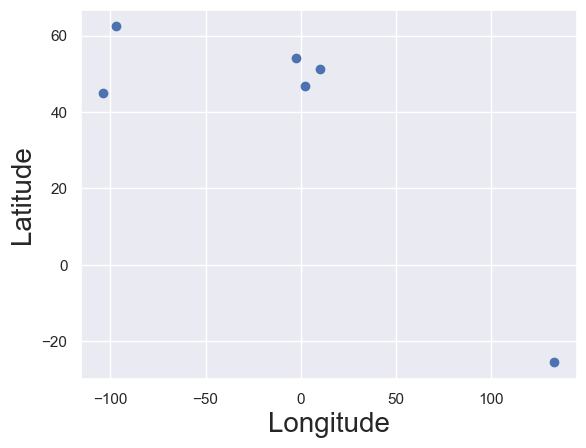

In [6]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.show()

In [7]:
data['Language'] = data['Language'].map({'English': 0, 'French': 1, 'German': 2})

In [8]:
x = data.iloc[:, 3:4]

In [9]:
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [10]:
kmeans = KMeans(2, n_init=10)
kmeans.fit(x)

KMeans(n_clusters=2)

In [11]:
kmeans.fit_predict(x)

array([0, 0, 1, 0, 1, 0])

In [12]:
cluster = data.copy()
cluster['cluster'] = kmeans.fit_predict(x)

In [13]:
cluster

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


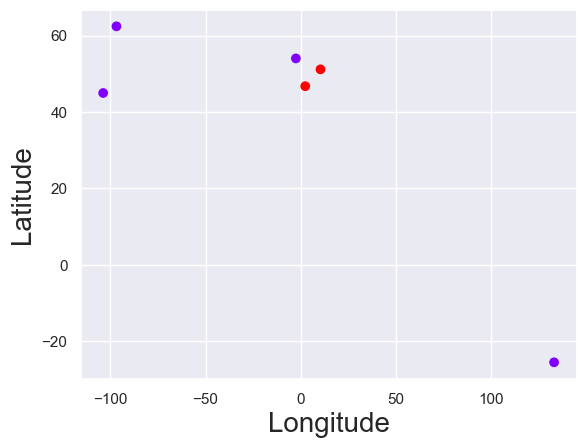

In [14]:
plt.scatter(cluster['Longitude'], cluster['Latitude'], c=cluster['cluster'], cmap='rainbow')
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.show()

### WCSS

In [15]:
kmeans.inertia_

0.5

In [16]:
data.shape

(6, 4)

In [17]:
wcss = []

for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\AppData\Local\Temp\ipykernel_9996\2287699907.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\user\AppData\Local\Temp\ipykernel_9996\2287699907.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\user\AppData\Local\Temp\ipykernel_9996\2287699907.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(x)


In [18]:
wcss

[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]

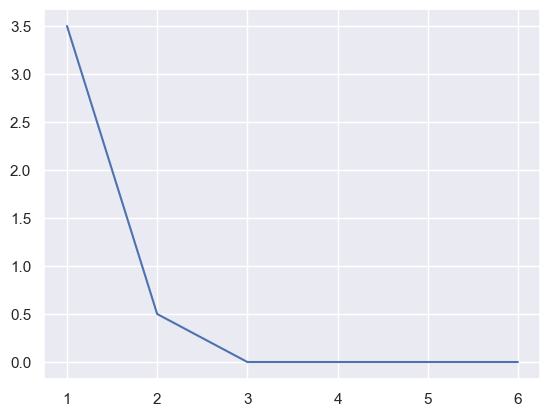

In [19]:
plt.plot(range(1, 7), wcss)
plt.show()